# Hetnet visualizations

In [1]:
library(magrittr)

## Metapath counts

In [2]:
count_df = readr::read_tsv('data/metapath-counts.tsv')
head(count_df, 2)

,source,target,source_abbrev,target_abbrev,length,metapaths
1,Anatomy,Anatomy,A,A,1,0
2,Anatomy,Anatomy,A,A,2,10


In [3]:
asinh_trans = scales::trans_new(name = 'asinh', transform = asinh, inverse = sinh)

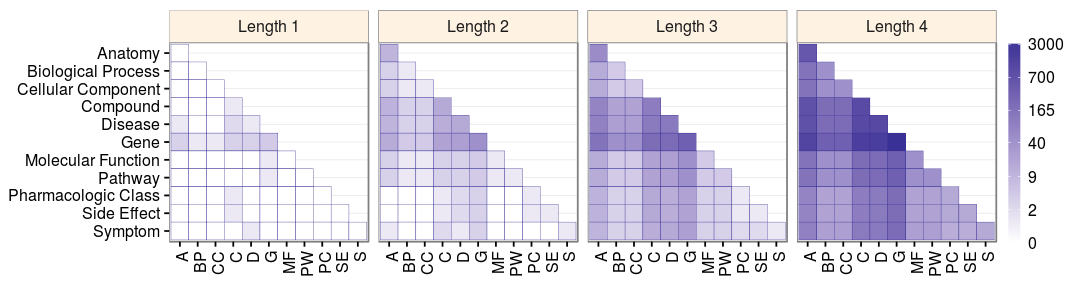

In [4]:
width = 9
height = 2.4
options(repr.plot.width=width, repr.plot.height=height)
gg = count_df %>%
  dplyr::filter(length <= 4) %>%
  dplyr::mutate(length = paste0('Length ', length)) %>%
  ggplot2::ggplot(ggplot2::aes(source_abbrev, target, fill = metapaths)) +
  ggplot2::geom_tile(color='#393196') +
  ggplot2::facet_grid(. ~ length) +
  ggplot2::scale_fill_continuous(
    name = NULL, low = 'white', high='#393196', trans = asinh_trans, breaks = c(0, 2, 9, 40, 165, 700, 3000),
    guide = ggplot2::guide_colorbar(barwidth = 0.5, barheight = 8.5)
  ) +
  ggplot2::scale_x_discrete(limits=unique(count_df$source_abbrev)) +
  ggplot2::scale_y_discrete(limits=rev(unique(count_df$target))) +
  ggplot2::coord_equal() +
  ggplot2::xlab(NULL) +
  ggplot2::ylab(NULL) +
  ggplot2::theme_bw() +
  ggplot2::theme(
    panel.grid.major.x = ggplot2::element_blank(),
    panel.grid.minor = ggplot2::element_blank(),
    axis.text.x = ggplot2::element_text(angle = 90, hjust = 1, vjust = 0.7),
    strip.background = ggplot2::element_rect(fill='#FEF2E2'),
    plot.margin = grid::unit(c(2, 2, 2, 2), 'points'),
    legend.margin = grid::unit(2, 'points')
  )

ggplot2::ggsave('figure/metapath-counts.png', gg, dpi = 300, width = width, height = height)
ggplot2::ggsave('figure/metapath-counts.pdf', gg, width = width, height = height)
plot(gg)

In [5]:
max(count_df$metapaths)
sinh(seq(0, asinh(3000), length.out=7))

[1] 3542

[1]    0.000000    2.014090    9.058087   38.723379  165.094851  703.767440
[7] 3000.000000

## Edge counts

## Chord diagram

Using the `circlize` package.

See:

+ circlize [chord diagram vignette](https://cran.r-project.org/web/packages/circlize/vignettes/visualize_relations_by_chord_diagram.pdf)
+ https://doi.org/10.1093/bioinformatics/btu393
+ https://doi.org/10.1101/gr.092759.109

In [6]:
metanode_df = readr::read_tsv('../../data/summary/metanodes.tsv') 
metaedge_df = readr::read_tsv('../../data/summary/metaedges.tsv') %>%
  dplyr::left_join(
    readr::read_tsv('../../data/summary/metaedge-styles.tsv')
  ) %>%
  dplyr::inner_join(metanode_df %>% dplyr::transmute(source = metanode, source_abbr = abbreviation)) %>%
  dplyr::inner_join(metanode_df %>% dplyr::transmute(target = metanode, target_abbr = abbreviation)) %>%
  dplyr::transmute(from=source_abbr, to=target_abbr, value=edges, standard_abbreviation)

Joining by: c("metaedge", "abbreviation")
Joining by: "source"
Joining by: "target"


pdf 
  2

pdf 
  2

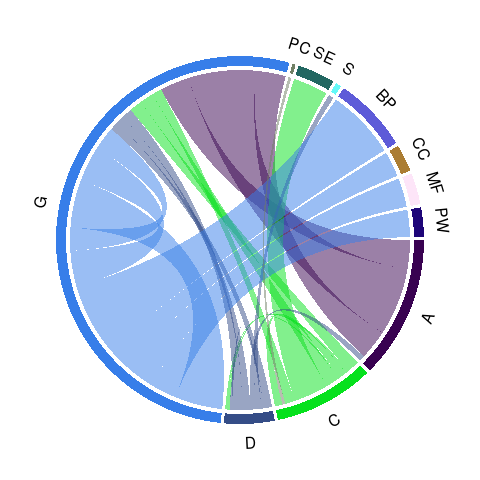

In [7]:
make_chord_plot <- function(seed = 0) {
  set.seed(seed)
  metaedge_df %>%
    dplyr::mutate(value = sqrt(value)) %>%
    circlize::chordDiagram(annotationTrack = c('name', 'grid'))
}

width = 4
height = 4
options(repr.plot.width=width, repr.plot.height=height)

seed = 9

pdf('figure/edge-chord-diagram.pdf', width = width, height = height)
make_chord_plot(seed)
dev.off()

png('figure/edge-chord-diagram.png', width = width, height = height, units = 'in', res = 600)
make_chord_plot(seed)
dev.off()

make_chord_plot(seed)